- 많은 문장과 문서중에서 유사한 문장을 찾는 방법
- 문장을 백터로 표현, 백터간 거리를 구할 수 있다.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

** CountVectorizer **
- 문서를 토큰 리스트로 변환
- 각 문서의 토큰 출현 빈도를 카운트
- 각 문서의 BOW를 백터로 변환한다. #BOW가 뭥미

In [3]:
vectorizer = CountVectorizer(min_df=1)# default 1 1개 미만 무시

In [4]:
# 몇가지로 테스트
contents = ['짱구랑 놀러가고 싶지만 바쁜데 어떻하죠?',
           '짱구는 공원에서 산책하고 노는 것을 싫어해요',
           '짱구는 공원에서 노는 것도 싫어해요. 이상해요',
           '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요.']

In [6]:
# 백터화
X = vectorizer.fit_transform(contents) # fit-> dataframe으로 들어와야함.
X.shape

(4, 22)

In [7]:
# 특성 feature 이름을 확인
tmp = vectorizer.get_feature_names()
print(len(tmp),tmp)

22 ['것도', '것을', '곳으로', '공원에서', '그러질', '너무', '노는', '놀러가고', '떠나고', '못하고', '바빠서', '바쁜데', '산책하고', '싫어해요', '싶은데', '싶지만', '어떻하죠', '여행을', '이상해요', '있어요', '짱구는', '짱구랑']


In [10]:
# 각 feature(특성)에 대한 벡터값
X.toarray().transpose() #TDM이락 생각함.
# '것도': 세번째 문장에서만 발견되므로 :0(없다) 1(있다.)
# 22개에 대한 원핫 인코딩임.

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0]], dtype=int64)

In [12]:
# (4,22)
# 훈련할 샘플수   특성수
num_samples, num_features = X.shape
print(num_samples, num_features)

4 22


In [13]:
# 신규 데이터 문장을 벡터로 만들어서 유사도 체크

In [87]:
new_texts = ['짱구랑 공원에서 산책하고 놀고 싶어요.']
new_text_vec = vectorizer.transform(new_texts)# fit 쓰면 안됨. 이건 훈련 데이터 아님
tmp = new_text_vec.toarray()

<1x20 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [19]:
tmp,tmp.shape
# 특성이 문장 안에있으면 1, 없으면 0해서 개수가 총 22개 짜리

(array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]],
       dtype=int64), (1, 22))

In [24]:
import scipy as sp
# 거리 계산
def distance_vec(v1, v2):
    delta= v1-v2
    # 유클리드 거리
    return sp.linalg.norm(delta.toarray())

In [25]:
# 테스트 데이터와 훈련 데이터와 거리를 계산 하면서 최소 거리에 있는 훈련 데이터를 찾는다.
# 이것이 가장 유사도가 높은 문장이다.
# 훈련 데이터에서 벡터를 뽑는 방법
distance_vec(X.getrow(0),new_text_vec) #첫문장에 대한 vectora data

2.449489742783178

In [37]:
# for  n in range(X.shape[0]):
#     print(distance_vec(X.getrow(n),new_text_vec))    
#     print(type(distance_vec(X.getrow(n),new_text_vec)))

2.449489742783178
<class 'numpy.float64'>
2.23606797749979
<class 'numpy.float64'>
2.6457513110645907
<class 'numpy.float64'>
3.4641016151377544
<class 'numpy.float64'>


In [66]:
########################################내 코드 ####################################################
import numpy as np
distance_list=[]

for n in range(X.shape[0]):
    distance_list.append(distance_vec(X.getrow(n),new_text_vec)) 

min_dis = np.min(distance_list)
ind=distance_list.index(min_dis)
print(contents[ind], min_dis)

#AttributeError: 'list' object has no attribute 'min'

짱구는 공원에서 산책하고 노는 것을 싫어해요 2.23606797749979


In [71]:
#########################################강사님 코드#######################################################
# 큰값을 넣었다.
min_distance = 65536-1 # 2^32 (4바이트?)
min_index = None
for i in range(len(contents)):
    dis = distance_vec(X.getrow(i),new_text_vec)
    print(dis, i, contents[i])
    if dis < min_distance:
        min_distance = dis
        min_index = i
else:
    print('최소 거리:', min_distance, min_index, contents[min_index])
        

2.449489742783178 0 짱구랑 놀러가고 싶지만 바쁜데 어떻하죠?
2.23606797749979 1 짱구는 공원에서 산책하고 노는 것을 싫어해요
2.6457513110645907 2 짱구는 공원에서 노는 것도 싫어해요. 이상해요
3.4641016151377544 3 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요.
최소 거리: 2.23606797749979 1 짱구는 공원에서 산책하고 노는 것을 싫어해요


** 한글 벡터화의 합리적인 처리 **

In [72]:
from konlpy.tag import Okt
t = Okt()

In [79]:
# 분석
t.morphs(contents[0]),t.pos(contents[0]) # 앞에껀 형태소 tag x, 뒤에껀 tag 0
#t.nouns(contents[0])

(['짱구', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?'],
 [('짱구', 'Noun'),
  ('랑', 'Josa'),
  ('놀러', 'Verb'),
  ('가고', 'Verb'),
  ('싶지만', 'Verb'),
  ('바쁜데', 'Adjective'),
  ('어떻하죠', 'Adjective'),
  ('?', 'Punctuation')])

In [76]:
contents
'''
['짱구 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
'''

['짱구랑 놀러가고 싶지만 바쁜데 어떻하죠?',
 '짱구는 공원에서 산책하고 노는 것을 싫어해요',
 '짱구는 공원에서 노는 것도 싫어해요. 이상해요',
 '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요.']

In [80]:
#for i in range(len(contents)):
[' '.join(t.morphs(contents[i])) for i in range(len(contents))]  #내꺼
contents_ko_vectorize = [' '.join(t.morphs(content)) for content in contents]
contents_ko_vectorize

['짱구 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 '짱구 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 '짱구 는 공원 에서 노 는 것 도 싫어해요 . 이상해요',
 '먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요 .']

In [83]:
X = vectorizer.fit_transform(contents_ko_vectorize)
num_samples, num_features = X.shape
num_samples, num_features
# 특성수가 줄어 들었다.

(4, 20)

In [85]:
print(vectorizer.get_feature_names())

['가고', '공원', '그러질', '너무', '놀러', '떠나고', '바빠서', '바쁜데', '산책', '싫어해요', '싶은데', '싶지만', '어떻하죠', '에서', '여행', '으로', '이상해요', '있어요', '짱구', '하고']


<1x20 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [101]:
# 신규 데이터 - 이것과 가장 가까운 문장을 찾으시오.
new_texts = ['짱구랑 공원에서 산책하고 놀고 싶어요']
new_texts = [' '.join(t.morphs(txt)) for txt in new_texts] # 이걸 꼭 해줘야하나?
new_text_vec = vectorizer.transform(new_texts)  # 현재 모델에 대해 다시 데이터의 형태를 변형 시켜줘야 한다.

min_distance = 65536-1 # 2^32 (4바이트?)
min_index = None
for i in range(len(contents)):    
    dis = distance_vec(X.getrow(i),new_text_vec)
    print(dis, i, contents[i])
    if dis < min_distance:
        min_distance = dis
        min_index = i
else:
    print('최소 거리:', min_distance, min_index, contents[min_index]) # 난 왜 결과가 다른가??

3.0 0 짱구랑 놀러가고 싶지만 바쁜데 어떻하죠?
1.0 1 짱구는 공원에서 산책하고 노는 것을 싫어해요
2.0 2 짱구는 공원에서 노는 것도 싫어해요. 이상해요
3.4641016151377544 3 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요.
최소 거리: 1.0 1 짱구는 공원에서 산책하고 노는 것을 싫어해요


In [102]:
# 문장의 백터값을 확인해서 비교
for i in range(len(contents)):
    if i == min_index:
        print(contents[i])
        print(X.getrow(i).toarray())
print('-'*50)
print(new_texts)
print(new_text_vec.toarray())

짱구는 공원에서 산책하고 노는 것을 싫어해요
[[0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1]]
--------------------------------------------------
['짱구 랑 공원 에서 산책 하고 놀고 싶어요']
[[0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1]]


In [ ]:
# 거리 계산 -> v1, v2를 각각 나름 정규화(sp.linalg.norm)를 통해 정리를 하고 다시 계산
def distance_vec(v1, v2):
    delta= v1-v2
    # 유클리드 거리
    return sp.linalg.norm(delta.toarray())

### tf,idf 활용해서 더 향상 시킨다.

- tf : term frequency - 어떤 단어가 문서내에서 자주 등장 할 수록 중요도가 높아진다.
- idf : inverse document frequency -> 문서간 비교시 모든 문서상에서 같은 단어가 있다면, 특히 그 단어가 어휘라고 볼 수 있을지 없을지 모르겠으나 이런 단어는 비교시에 중요한 단어가 아니다.(? 뭔소리임) 대충알듯말듯
- 텍스트 마이닝 장르에서 단어별로 부과하는 가중치 적용법

In [106]:
import scipy as sp
def myTfIdf(t, d, D):# d : 훈련시켜야할 문장 하나하나(리스트)#t : 확인 하고자 하는 단어
    tf = float(d.count(t))/sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D))) / (len([doc for doc in D if t in doc]))
    return tf,idf

In [107]:
a, abb, abc = ['가'],['가','나','나'],['가','나','다']
D = [a, abb, abc]

print( myTfIdf('가', a, D))
print( myTfIdf('나',abb, D))
print( myTfIdf('가',abc, D))
print( myTfIdf('나',abc, D))
print( myTfIdf('다',abc, D))

(1.0, 0.3662040962227033)
(0.6666666666666666, 0.5493061443340549)
(0.3333333333333333, 0.3662040962227033)
(0.3333333333333333, 0.5493061443340549)
(0.3333333333333333, 1.0986122886681098)


### 라이브러리 에서 tf idf를 사용하여 벡터화 처리 하는 클래스 제공
    

In [110]:
from sklearn.feature_extraction.text import  TfidfVectorizer
#성능 향상을 위해 알고리즘 교체함.
vectorizer = TfidfVectorizer(min_df=1, decode_error = 'ignore')

In [111]:
contents_ko_vectorize

['짱구 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 '짱구 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 '짱구 는 공원 에서 노 는 것 도 싫어해요 . 이상해요',
 '먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요 .']

In [113]:
# 훈련
X = vectorizer.fit_transform(contents_ko_vectorize)#transform이 데이터 프레임이 아닐때
num_samples, num_features = X.shape
print(num_samples, num_features)

4 20


In [115]:
new_texts

['짱구 랑 공원 에서 산책 하고 놀고 싶어요']

In [116]:
new_texts = vectorizer.transform(new_texts)

In [117]:
min_distance = 65536-1 # 2^32 (4바이트?)
min_index = None
for i in range(len(contents)):    
    dis = distance_vec(X.getrow(i),new_text_vec)
    print(dis, i, contents[i])
    if dis < min_distance:
        min_distance = dis
        min_index = i
else:
    print('최소 거리:', min_distance, min_index, contents[min_index]) # 난 왜 결과가 다른가??

2.3347433527535997 0 짱구랑 놀러가고 싶지만 바쁜데 어떻하죠?
1.3936425694229 1 짱구는 공원에서 산책하고 노는 것을 싫어해요
1.8843837411317481 2 짱구는 공원에서 노는 것도 싫어해요. 이상해요
2.3373021997745425 3 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요.
최소 거리: 1.3936425694229 1 짱구는 공원에서 산책하고 노는 것을 싫어해요


In [120]:
# 한글처리 
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')

In [121]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

### 웹 문서에서 특정 단어 검색
- 해당 단어에 거리가 가까운, 연관어 등 단어 조사
- 데이터의 중요성 확인 가능

In [130]:
keyword = '최저임금'
#UnicodeEncodeError: 'ascii' codec can't encode characters in position 46-49: ordinal not in range(128)
# 최저임금 => 인코딩
target_url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={keyword}'

In [134]:
urllib.parse.quote(keyword)
urlopen(target_url.format(keyword=urllib.parse.quote(keyword)))
# HTTPError: HTTP Error 403: Forbidden  => 웹에서는 되는데 여기서는 안됨 header 문제

HTTPError: HTTP Error 403: Forbidden

In [138]:
keyword = '최저임금'
target_url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={keyword}'
url = target_url.format(keyword=urllib.parse.quote(keyword))

req = urllib.request.Request(url, headers={'User-Agent':'Mozilla/5.0'})
#실제 요청
response = urllib.request.urlopen(req).read() #urlopen(url)
response


https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%B5%9C%EC%A0%80%EC%9E%84%EA%B8%88


b'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="\xec\xb5\x9c\xec\xa0\x80\xec\x9e\x84\xea\xb8\x88 : \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'\xec\xb5\x9c\xec\xa0\x80\xec\x9e\x84\xea\xb8\x88\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89 \xea\xb2\xb0\xea\xb3\xbc\xec\x9e\x85\xeb\x8b\x88\xeb\x8b\xa4."> <meta name="description" lang="ko" content="\'\xec\xb5\x9c\xec\xa0\x80\xec\x9e\x84\xea\xb8\x88\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89 \xea\xb2\xb0\

In [139]:
soup = BeautifulSoup(response, 'html.parser')

In [140]:
# dl만 모아서 밑에 있는 텍스트를 수집하여 []에 담아라

'           최저임금 : 네이버 뉴스검색     naver = window.naver || {}; naver.search = naver.search || {}; var g_D = 0 ; if (!String.prototype.trim) { String.prototype.trim = function () { return this.replace(/^[\\s\\uFEFF\\xA0]+|[\\s\\uFEFF\\xA0]+$/g, \'\'); }; } function urlencode (q) { return escape(q).replace(/\\+/g, "%2B") ; } function urlexpand (url) { var href = document.location.href ; if (url == "") return href ; if (url.match(/^[-.A-Za-z]+:/)) return url ; if (url.charAt(0) == \'#\') return href.split("#")[0] + url ; if (url.charAt(0) == \'?\') return href.split("?")[0] + url ; if (url.charAt(0) == \'/\') return href.replace(/([^:\\/])\\/.*$/, "$1") + url ; return href.substring(0, href.lastIndexOf("/")+1) + url ; } naver.search.error = (function () { var errorList = Array() ; return { add : function (s) { errorList.push(s) ; }, clear : function () { delete errorList ; }, get : function (s) { return errorList ; }, getString : function (d) { if (typeof d === \'undefined\') d = \'|\' ; ret

In [145]:
dl = soup.find_all('dl')
dl[:3]

[<dl class="sch_option"> <dt>기본검색</dt> <dd> <div class="inp_op"><input class="_base" title="기본검색어 입력" type="text"/></div> <p class="rule_check"><input class="incr _or" id="rch" onclick="tCR('a=fno.dtsors');" type="checkbox"/><label for="rch">입력한 단어가 하나이상 포함된 문서 검색</label></p> </dd> </dl>,
 <dl class="sch_option more_sch"> <dt>상세검색</dt> <dd> <div class="inp_op"><input class="_exact" id="inpop1" type="text"/><label class="_placeholder_exact" for="inpop1">정확히 일치하는 단어/문장(" ")</label></div> <div class="inp_op"><input class="_include" id="inpop2" type="text"/><label class="_placeholder_include" for="inpop2">반드시 포함하는 단어(+)</label></div> <div class="inp_op"><input class="_exclude" id="inpop3" type="text"/><label class="_placeholder_exclude" for="inpop3">제외하는 단어(-)</label></div> <div class="tx_area"> <p class="tx_noti">기본검색의 결과 범위를 줄이고자 할 때 사용합니다.<br/>여러개의 단어를 입력하실 때는<span class="tx">쉼표(,)</span>로 구분해서 입력하세요.</p> </div> </dd> </dl>,
 <dl class="relate_area _related_keyword_area"> <dt><span clas

In [146]:
[parser.text for parser in dl]    

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    김동연 최저임금   주휴수당 최저임금   2018년 최저임금   kdi   최저임금 인상   최저임금 지역별   최저임금 인상 찬반   최저임금제도의 개선방향   불법체류자   이재갑     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 " 종반 향하는 국정감사…오늘은 최저임금·국민연금 공방 연합뉴스언론사 선정  8시간 전  네이버뉴스   보내기   산업통상자원중소벤처기업위는 중소기업진흥공단·소상공인시장진흥공단 등 12개 기관을 대상으로 문재인정부의 최저임금 인상 여파 등을 집중 추궁한다. 자유한국당 의원들은 문재인정부 출범 이후 최저임금의 급격한...     국정감사 최저임금·국민연금 등 공방  tbs 교통방송  6시간 전     [2018국감] 오늘 국정감사 초점 '최저임금·국민연금'  천지일보  6시간 전     '절반 지난' 2018 국감...23일 핵심은 국민연금·최저임금  공감신문  2시간 전     막바지 치닫는 국정감사…최저임금,국민연금 집중 추궁  한국정경신문  3시간 전     관련뉴스 7건 전체보기   ",
 ' [2018 국감] "공공기관 최저임금 위반 액수 10억2300만원" 신아일보  2시간 전   보내기   (사진=연합뉴스) 정부의 재정 지원으로 운영되는 공공기관들이 지난 수년간 최저임금을 제대로 지급하지 않은 것으로 확인됐다. 23일 국회 환경노동위원회 소속 설훈 더불어민주당 의원실이 고용부로부터 제출...     모범 보여야 할 공공기관, 최저임금 위반 3258건 적발  에너지데일리  2시간 전     [2018국감] 공공기관 최저임금 위반, 최근 5년간 3000건·10억 넘어  아시아투데이 

In [148]:
'''https://section.blog.naver.com/Search/Post.nhn?
pageNo=1&rangeType=ALL&orderBy=sim&keyword=%EB%B6%80%EC%82%B0%EB%8C%80%20%EB%A7%9B%EC%A7%91'''
keyword = '부산대맛집'
pageNo = 1
target_url = 'https://section.blog.naver.com/Search/Post.nhn?pageNo={pageNo}&rangeType=ALL&orderBy=sim&keyword={keyword}'
url = target_url.format(pageNo=pageNo, keyword=urllib.parse.quote(keyword))

req = urllib.request.Request(url, headers={'User-Agent':'Mozilla/5.0'})
#실제 요청
response = urllib.request.urlopen(req).read() #urlopen(url)
response

b'\n\n\n\n<!DOCTYPE html>\n<html lang="ko">\n<head>\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <base href="/home" />\n    <meta name="robots" content="noindex,nofollow"/>\n    <meta name="referrer" content="always"/>\n    <meta name="format-detection" content="telephone=no">\n    <link rel="shortcut icon" type="image/x-icon" href="https://section.blog.naver.com/favicon.ico?2"/>\n    \r\n\r\n\r\n\r\n\r\n \r\n\r\n\t\r\n\t\t<meta property="og:title" content="\xeb\xb6\x80\xec\x82\xb0\xeb\x8c\x80\xeb\xa7\x9b\xec\xa7\x91 : \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xb8\x94\xeb\xa1\x9c\xea\xb7\xb8"/>\r\n\r\n\t\t\r\n\t\t\t\r\n\t\t\t\r\n\t\t\t<meta property="og:image" content="https://blogimgs.pstatic.net/nblog/mylog/post/og_default_image_160610.png"/>\r\n\t\t\t\r\n\t\t\t\t\r\n\t\t<meta property="og:description" content="\xec\xa2\x8b\xec\x9d\x80 \xea\xb8\x80\xea\xb3\xbc \xec\x83\x88\xeb\xa1\x9c\xec\x9a\xb4 \xec\x9d\xb4\xec\x9b\x83\xec\x9d\x84 \xeb\xa7\x8c\xeb\x82\x98\xeb\x8a

In [151]:
soup = BeautifulSoup(response, 'html.parser')
soup.select('div .desc')

[]

In [241]:
from tqdm import tqdm_notebook
keyword = 'bts'
# 총 수집된 문장 덩어리를 담는 그릇
news_texts = []
for n in tqdm_notebook(range(1, 2000 ,10)):
    start = n # 11 ,21 ~
    target_url = 'https://search.naver.com/search.naver?&where=news&query={keyword}&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=10&start={start}&refresh_start=0'
    url = target_url.format(keyword=urllib.parse.quote(keyword), start = start)

    req = urllib.request.Request(url, headers={'User-Agent':'Mozilla/5.0'})
    #실제 요청
    response = urllib.request.urlopen(req).read() #urlopen(url)
    soup = BeautifulSoup(response, 'html.parser')
    # 수집 데이터(+ or extend())
    news_texts += [parser.text for parser in soup.find_all('dl')]
    time.sleep(0.2)

In [242]:
len(news_texts)

2600

In [243]:
news_texts

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    방탄소년단   bts 소속사   방탄 파리   bts 지민   네이처컬렉션 매장   빅히트 엔터테인먼트   bts 뜻   파리 bts   방탄 파리공연   방탄 쇼핑몰     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 ' "BTS 티켓 싸게 팔아요" 여중생 팬 울린 10대 사기꾼 구속 연합뉴스언론사 선정  4시간 전  네이버뉴스   보내기   여중생들에게 인기 아이돌그룹 방탄소년단(BTS)의 콘서트 티켓 등을 싸게 판다고 속여 돈만 챙긴 10대가... A 씨는 지난해 7월 2일부터 석 달간 스마트폰 카카오 스토리에 BTS 콘서트 티켓, 온라인 게임인 \'테일즈 런너...     "BTS 콘서트 티켓 싸게 팔아요" 여중생 상대 돈만 챙겼다 구속  SBS  4시간 전 네이버뉴스     “BTS 콘서트 티켓 싸게 판다”며 속이고 돈만 챙긴 10대 구속  서울신문  3시간 전 네이버뉴스     "BTS 티켓 싸게 팔아요"… 여중생 울린 10대 \'덜미\'  머니S  32분 전 네이버뉴스     BTS 콘서트 티켓 싸게 팔아요 여중생 상대 돈만 챙겼다 구속  KNN  1시간 전     관련뉴스 12건 전체보기   ',
 ' BTS 콘서트 티켓 판매 등 사기로 600만원 챙긴 10대 구속 뉴시스  4시간 전  네이버뉴스   보내기   = 세계적으로 인기를 얻고 있는 아이돌그룹 방탄소년단(BTS)의 콘서트 티켓 등을 판매한다고 속여 돈만 챙친 10대가 경찰에 붙잡혔다. 부산 연제경찰서는 23일 A(19)군을 사기 혐의로 구속했다고 밝혔다. 경찰에...     "BTS 콘서트 티켓 팝니다" SNS서 사기 친 10대 구속  노컷뉴스  

In [244]:
len(news_texts)
news_texts_tmp = news_texts.copy()

In [163]:
for n in range(0, len(news_texts),13):
    
    news_texts_tmp[n] = ''
    news_texts_tmp[n+1] = ''
    news_texts_tmp[n+2] = ''

IndexError: list assignment index out of range

In [160]:
print(news_texts[13*0],news_texts[13*0+1],news_texts[13*0+2])
print(news_texts[13*1],news_texts[13*1+1],news_texts[13*1+2])
print(news_texts[13*2],news_texts[13*2+1],news_texts[13*2+2])
print(news_texts[13*3],news_texts[13*3+1],news_texts[13*3+2])
print(news_texts[13*1])
print(news_texts[13*2])
print(news_texts[13*3])

 기본검색   입력한 단어가 하나이상 포함된 문서 검색    상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.     연관검색어도움말    부산대   부산대 밥집   부산 부대 맛집   부산대 점심   부산대 카페   부산대 고기집   부산대앞 맛집   부산대 스시   부산대 놀거리   부산대 일식     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 
 기본검색   입력한 단어가 하나이상 포함된 문서 검색  
 기본검색   입력한 단어가 하나이상 포함된 문서 검색  
 기본검색   입력한 단어가 하나이상 포함된 문서 검색  


In [245]:
news_texts_tmp

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    방탄소년단   bts 소속사   방탄 파리   bts 지민   네이처컬렉션 매장   빅히트 엔터테인먼트   bts 뜻   파리 bts   방탄 파리공연   방탄 쇼핑몰     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 ' "BTS 티켓 싸게 팔아요" 여중생 팬 울린 10대 사기꾼 구속 연합뉴스언론사 선정  4시간 전  네이버뉴스   보내기   여중생들에게 인기 아이돌그룹 방탄소년단(BTS)의 콘서트 티켓 등을 싸게 판다고 속여 돈만 챙긴 10대가... A 씨는 지난해 7월 2일부터 석 달간 스마트폰 카카오 스토리에 BTS 콘서트 티켓, 온라인 게임인 \'테일즈 런너...     "BTS 콘서트 티켓 싸게 팔아요" 여중생 상대 돈만 챙겼다 구속  SBS  4시간 전 네이버뉴스     “BTS 콘서트 티켓 싸게 판다”며 속이고 돈만 챙긴 10대 구속  서울신문  3시간 전 네이버뉴스     "BTS 티켓 싸게 팔아요"… 여중생 울린 10대 \'덜미\'  머니S  32분 전 네이버뉴스     BTS 콘서트 티켓 싸게 팔아요 여중생 상대 돈만 챙겼다 구속  KNN  1시간 전     관련뉴스 12건 전체보기   ',
 ' BTS 콘서트 티켓 판매 등 사기로 600만원 챙긴 10대 구속 뉴시스  4시간 전  네이버뉴스   보내기   = 세계적으로 인기를 얻고 있는 아이돌그룹 방탄소년단(BTS)의 콘서트 티켓 등을 판매한다고 속여 돈만 챙친 10대가 경찰에 붙잡혔다. 부산 연제경찰서는 23일 A(19)군을 사기 혐의로 구속했다고 밝혔다. 경찰에...     "BTS 콘서트 티켓 팝니다" SNS서 사기 친 10대 구속  노컷뉴스  

In [246]:
news_texts_tmp.count('')

0

In [247]:
news_texts_tmp.remove('')
news_texts_tmp.

SyntaxError: invalid syntax (<ipython-input-247-41548dfb70d1>, line 2)

In [248]:
leng = news_texts_tmp.count('')
for i in range(leng):
    news_texts_tmp.remove('')

In [249]:
news_texts_tmp[:10]

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    방탄소년단   bts 소속사   방탄 파리   bts 지민   네이처컬렉션 매장   빅히트 엔터테인먼트   bts 뜻   파리 bts   방탄 파리공연   방탄 쇼핑몰     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 ' "BTS 티켓 싸게 팔아요" 여중생 팬 울린 10대 사기꾼 구속 연합뉴스언론사 선정  4시간 전  네이버뉴스   보내기   여중생들에게 인기 아이돌그룹 방탄소년단(BTS)의 콘서트 티켓 등을 싸게 판다고 속여 돈만 챙긴 10대가... A 씨는 지난해 7월 2일부터 석 달간 스마트폰 카카오 스토리에 BTS 콘서트 티켓, 온라인 게임인 \'테일즈 런너...     "BTS 콘서트 티켓 싸게 팔아요" 여중생 상대 돈만 챙겼다 구속  SBS  4시간 전 네이버뉴스     “BTS 콘서트 티켓 싸게 판다”며 속이고 돈만 챙긴 10대 구속  서울신문  3시간 전 네이버뉴스     "BTS 티켓 싸게 팔아요"… 여중생 울린 10대 \'덜미\'  머니S  32분 전 네이버뉴스     BTS 콘서트 티켓 싸게 팔아요 여중생 상대 돈만 챙겼다 구속  KNN  1시간 전     관련뉴스 12건 전체보기   ',
 ' BTS 콘서트 티켓 판매 등 사기로 600만원 챙긴 10대 구속 뉴시스  4시간 전  네이버뉴스   보내기   = 세계적으로 인기를 얻고 있는 아이돌그룹 방탄소년단(BTS)의 콘서트 티켓 등을 판매한다고 속여 돈만 챙친 10대가 경찰에 붙잡혔다. 부산 연제경찰서는 23일 A(19)군을 사기 혐의로 구속했다고 밝혔다. 경찰에...     "BTS 콘서트 티켓 팝니다" SNS서 사기 친 10대 구속  노컷뉴스  

In [250]:
import nltk
from konlpy.tag import Okt
t = Okt()

In [251]:
news_texts_tmp_join = '\n'.join(news_texts_tmp)

In [252]:
len(news_texts_tmp_join)

559612

In [253]:
tokens_ko = t.morphs(news_texts_tmp_join)
len(tokens_ko)

193606

In [254]:
ko = nltk.Text(tokens_ko, name='부산대맛집')
tmp = ko.vocab().most_common(100)

In [255]:
tmp

[('.', 7918),
 ('BTS', 6002),
 ("'", 4416),
 ('방탄소년단', 3496),
 (',', 3147),
 ('(', 2995),
 ('...', 2708),
 ('의', 2639),
 (')', 2537),
 ('이', 2151),
 ('보내기', 2000),
 ('를', 1993),
 ('네이버뉴스', 1935),
 ('을', 1846),
 ('에', 1609),
 ('2018.10', 1556),
 ('한', 1414),
 ('"', 1404),
 ('‘', 1252),
 ('전', 1245),
 ('가', 1230),
 ('[', 1123),
 ('는', 1108),
 (']', 1048),
 ('은', 1028),
 ('’', 1005),
 ('단어', 1001),
 ('에서', 989),
 ('파리', 975),
 ('뉴스', 948),
 ('2018.09', 929),
 ('공연', 921),
 ('하는', 879),
 ('들', 840),
 ('bts', 810),
 ('검색', 807),
 ('로', 774),
 ('LG', 735),
 ('-', 732),
 ('방탄', 685),
 ('…', 652),
 ('1', 613),
 ('입력', 600),
 ('대통령', 592),
 ('그룹', 588),
 ('·', 582),
 ('세계', 576),
 ('\xa0', 563),
 ('미국', 537),
 ('빅히트', 526),
 ('과', 519),
 ('콘서트', 517),
 ('한국', 495),
 ('했다', 492),
 ('뉴욕', 465),
 ('7', 460),
 ('으로', 440),
 ('와', 437),
 ('때', 436),
 ('=', 436),
 ('프랑스', 432),
 ('전자', 432),
 ('지민', 430),
 ('된', 429),
 ('포함', 407),
 ('“', 402),
 ('사진', 402),
 ('연관검색어', 400),
 ('투어', 389),
 ('인', 386)

In [256]:
# 의미 없는 단어들은 제거 stopword
'''
('부산', 5129),
 ('.', 5012),
 ('대', 2720),
 ('의', 2404),
 (',', 2388),
 ('...', 2211),
 ('을', 1816),
 ('맛집', 1787),
 ('이', 1673),
 ('보내기', 1377),
 ('네이버뉴스', 1223),
 ('에', 1168),
 ('‘', 913),
 ('는', 825),
'''
stop_word = [ '.',"'",'’','‘',',','(',')','...', ')',']','[','뉴스','네이버뉴스','\xa0','을','이','의',', ','....','/','，','부산','대','맛집'
            ,'보내기','에','는','영화','산행','으로','일보','도','를','하는','들','과','와','단어','로','등']
token_ko = [word for word in tokens_ko if word not in stop_word]
token_ko
ko = nltk.Text(token_ko,name = '부산대맛집')
tmp = ko.vocab().most_common(50)

In [257]:
tmp

[('BTS', 6002),
 ('방탄소년단', 3496),
 ('2018.10', 1556),
 ('한', 1414),
 ('"', 1404),
 ('전', 1245),
 ('가', 1230),
 ('은', 1028),
 ('에서', 989),
 ('파리', 975),
 ('2018.09', 929),
 ('공연', 921),
 ('bts', 810),
 ('검색', 807),
 ('LG', 735),
 ('-', 732),
 ('방탄', 685),
 ('…', 652),
 ('1', 613),
 ('입력', 600),
 ('대통령', 592),
 ('그룹', 588),
 ('·', 582),
 ('세계', 576),
 ('미국', 537),
 ('빅히트', 526),
 ('콘서트', 517),
 ('한국', 495),
 ('했다', 492),
 ('뉴욕', 465),
 ('7', 460),
 ('때', 436),
 ('=', 436),
 ('프랑스', 432),
 ('전자', 432),
 ('지민', 430),
 ('된', 429),
 ('포함', 407),
 ('“', 402),
 ('사진', 402),
 ('연관검색어', 400),
 ('투어', 389),
 ('인', 386),
 ('서', 386),
 ('현지', 382),
 ('팬', 375),
 ('기자', 374),
 ('10', 366),
 ('연합뉴스', 359),
 ('”', 359)]

In [258]:
import matplotlib.pyplot as plt

In [259]:
from wordcloud import WordCloud, STOPWORDS
from PTL import Image

ModuleNotFoundError: No module named 'PTL'

In [260]:
data = ko.vocab().most_common(300)
fontPath = 'c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path = fontPath, relative_scaling=0.2, background_color='white').generate_from_frequencies(dict(data))

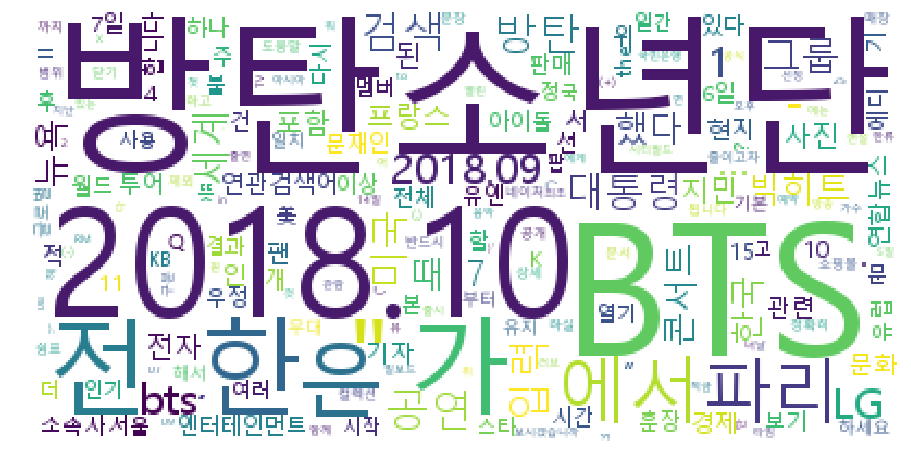

In [261]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [262]:
import gensim
from gensim.models import word2vec

In [263]:
t=Okt()
lines = news_texts.copy()

In [264]:
REMOVE_POS = ['Josa','Eomi','Puncation']
result = []
for line in tqdm_notebook(lines):
    m = t.pos(line, norm=True, stem=True)  #norem과 stem 옵션이 의미하는 바 ??
    # 조사나, 어미 제거 => 분석상 의미 없는 부분은 제거    
    r = [word[0] for word in m if not word[1] in REMOVE_POS ]
    r1 = (' '.join(r)).strip()
    #전처리한 데이터를 모아둠.
    result.append(r1)
result

['기본 검색 입력 단어 하나 이상 포함 되다 문서 검색',
 '상세 검색 정확하다 일치 하다 단어 / 문장 (" ") 반드시 포함 하다 단어 (+) 제외 하다 단어 (-) 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 . 여러 개 단어 입력 하다 때 쉼표 (,) 로 구분 하다 입력 하다 .',
 '연관검색어 도움말 방탄소년단 bts 소속사 방탄 파리 bts 지민 네이처 컬렉션 매장 빅히트 엔터테인먼트 bts 뜻 파리 bts 방탄 파리 공연 방탄 쇼핑몰 닫다 후 1 주 일간 유지 되다 . 연관검색어 다시 보다 ? 열기',
 '" BTS 티켓 싸다 파다 " 여중생 팬 울리다 10 대다 사기꾼 구속 연합뉴스 언론사 선정 4시간 전 네이버뉴스 보내다 여중생 들 인기 아이돌 그룹 방탄소년단 ( BTS ) 의 콘서트 티켓 등 싸다 판다 속이다 돈 챙기다 10 대가 ... A 씨 지난해 7월 2일 부터 석 달 간 스마트폰 카카오 스토리 BTS 콘서트 티켓 , 온라인 게임 \' 테일즈 런너 ... " BTS 콘서트 티켓 싸다 파다 " 여중생 상대 돈 챙기다 구속 SBS 4시간 전 네이버뉴스 “ BTS 콘서트 티켓 싸다 판다 ” 며 속 돈 챙기다 10 대다 구속 서울 신문 3시간 전 네이버뉴스 " BTS 티켓 싸다 파다 "… 여중생 울리다 10 대다 \' 덜미 \' 멀다 S 32분 전 네이버뉴스 BTS 콘서트 티켓 싸다 파다 여중생 상대 돈 챙기다 구속 KNN 1시간 전 관련 뉴스 12 건 전체 보기',
 'BTS 콘서트 티켓 판매 등 사기 600만원 챙기다 10 대다 구속 뉴시스 4시간 전 네이버뉴스 보내다 = 세계 적 인기 얻다 있다 아이돌 그룹 방탄소년단 ( BTS ) 의 콘서트 티켓 등 판매 하다 속이다 돈 챙친 10 대가 경찰 붙잡히다 . 부산 연 제 경찰서 23일 A ( 19 ) 군 사기 혐의 구속 하다 밝히다 . 경찰 ... " BTS 콘서트 티켓 파다 " SNS 서다 사기 친 10 대다 구속 노컷뉴스 4시간 전 네이버뉴스',
 '" 아이 들 BTS "…\'

In [265]:
#데이터 원본 저장
with open('./data/search_0.data','w',encoding='utf-8') as f:
    f.write('\n'.join(result))

In [266]:
# 모델 저장
data = word2vec.LineSentence('./data/search_0.data')
model = word2vec.Word2Vec(data,size=200, window=10, hs=1, min_count=2, sg=1)
model.save('./data/search_0.model')

In [267]:
# 모델 로드

model = word2vec.Word2Vec.load('./data/search_0.model')

In [270]:
# 유사 단어 검사
model.most_similar(positive=['전자'])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
D:\anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('LG', 0.8917416334152222),
 ('한강타임즈', 0.781734824180603),
 ('전광판', 0.7580171823501587),
 ('066570', 0.7572152614593506),
 ('FETV', 0.754657506942749),
 ('타임스스퀘어', 0.7518789768218994),
 ('한창', 0.7494990825653076),
 ('스튜디오', 0.7442609071731567),
 ('한창희', 0.74180006980896),
 ('가형', 0.7413825988769531)]